# Import Data

In [2]:
import pandas as pd
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
%matplotlib inline
plt.rc('font', family='AppleGothic')
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore') 

In [148]:
df = pd.read_csv('./heart_failure_clinical_records_dataset.csv')

In [4]:
df.tail()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
294,62.0,0,61,1,38,1,155000.0,1.1,143,1,1,270,0
295,55.0,0,1820,0,38,0,270000.0,1.2,139,0,0,271,0
296,45.0,0,2060,1,60,0,742000.0,0.8,138,0,0,278,0
297,45.0,0,2413,0,38,0,140000.0,1.4,140,1,1,280,0
298,50.0,0,196,0,45,0,395000.0,1.6,136,1,1,285,0


In [5]:
df.shape

(299, 13)

# Exploratory Data Analysis

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


### columns information
* **age ; 나이**
2. anaema ; 환자의 빈혈증 여부
3. creatinine_phosphokinase ; 크레아틴키나제 검사 결과
4. **diabetes ; 당뇨병 여부**
5. ejection_fraction ; 박출계수(%)
6. **high_blood_pressure ; 고혈압 여부**
7. platelets ; 혈소판 수
8. serum_creatinine ; 혈중 크레아틴 레벨
9. serum_sodium ; 혈중 나트륨 레벨
10. **sex ; 성별 (남성 1)**
11. **smoking ; 흡연**
12. **time : 관찰 기간(day)**
13. DEATH_EVEN ; 사망 여부

In [7]:
df.describe()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
count,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.000000,299.00000,299.000000,299.000000,299.00000,299.000000,299.00000
mean,60.833893,0.431438,581.839465,0.418060,38.083612,0.351171,263358.029264,1.39388,136.625418,0.648829,0.32107,130.260870,0.32107
std,11.894809,0.496107,970.287881,0.494067,11.834841,0.478136,97804.236869,1.03451,4.412477,0.478136,0.46767,77.614208,0.46767
min,40.000000,0.000000,23.000000,0.000000,14.000000,0.000000,25100.000000,0.50000,113.000000,0.000000,0.00000,4.000000,0.00000
25%,51.000000,0.000000,116.500000,0.000000,30.000000,0.000000,212500.000000,0.90000,134.000000,0.000000,0.00000,73.000000,0.00000
50%,60.000000,0.000000,250.000000,0.000000,38.000000,0.000000,262000.000000,1.10000,137.000000,1.000000,0.00000,115.000000,0.00000
75%,70.000000,1.000000,582.000000,1.000000,45.000000,1.000000,303500.000000,1.40000,140.000000,1.000000,1.00000,203.000000,1.00000
max,95.000000,1.000000,7861.000000,1.000000,80.000000,1.000000,850000.000000,9.40000,148.000000,1.000000,1.00000,285.000000,1.00000


## Variables

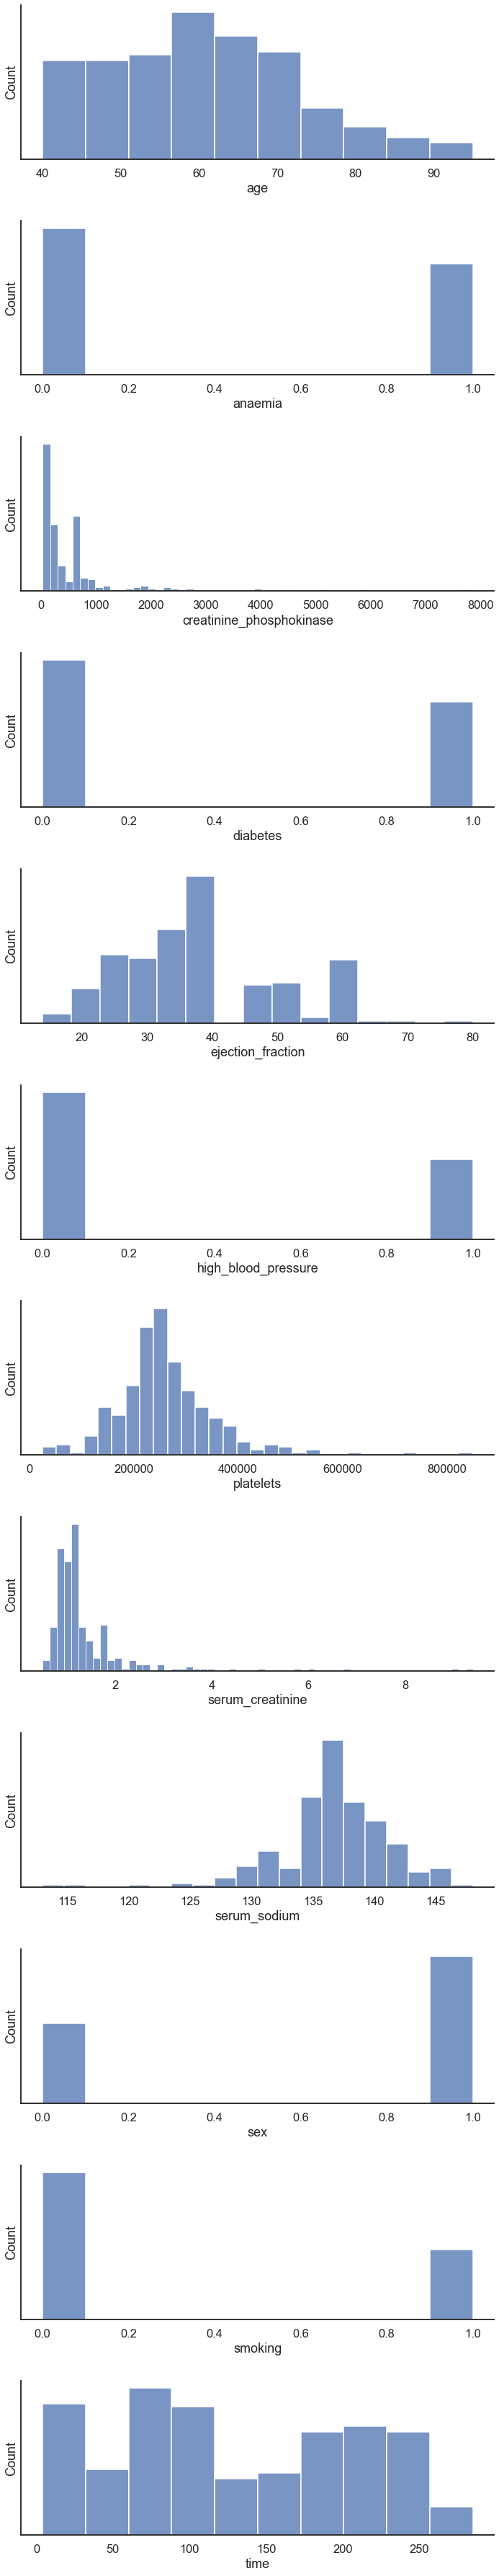

In [93]:
f, (ax1, ax2, ax3, ax4, ax5, ax6, ax7, ax8, ax9, ax10, ax11, ax12) = plt.subplots(12,1, figsize=(10,50))

for i in range(12):
    sns.histplot(x=df[df.columns[i]], palette="rocket", ax=f.axes[i])
#     f.axes[i].set_ylabel(df.columns[i])

sns.despine(bottom=False)
plt.setp(f.axes, yticks=[])
plt.tight_layout(h_pad=2)

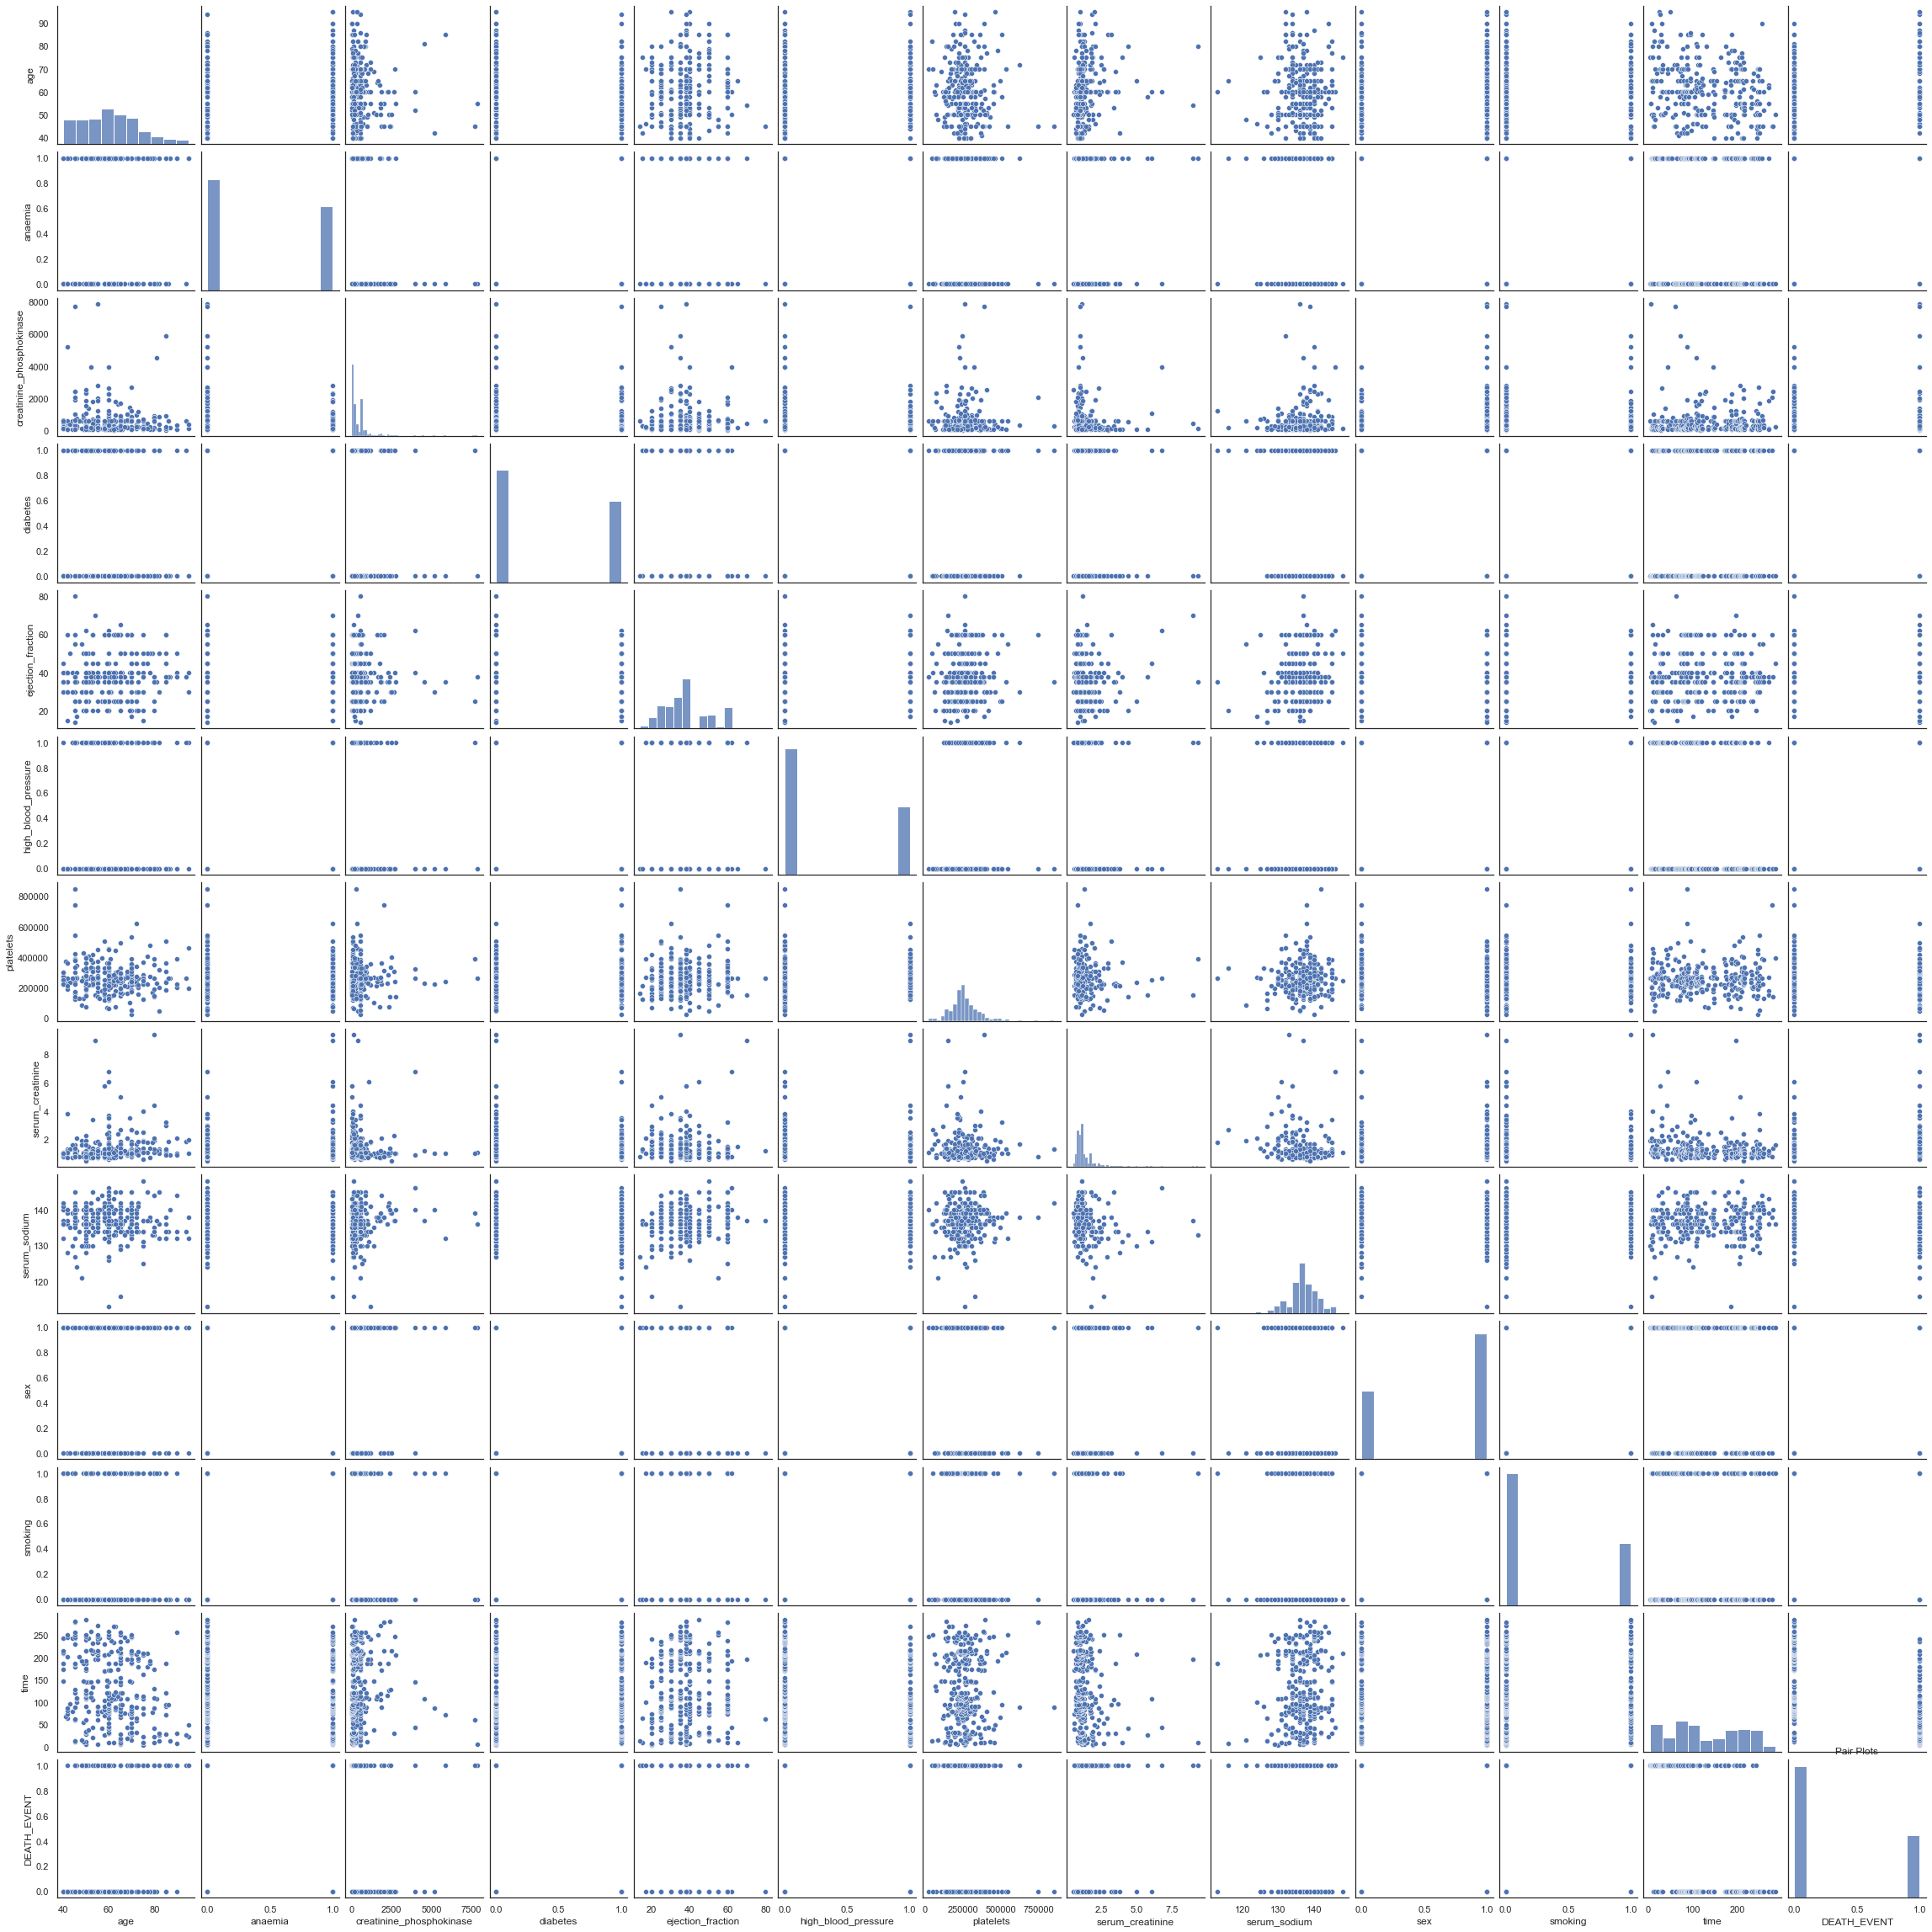

In [150]:
sns.pairplot(df)
plt.title("Pair Plots")
plt.show()

<AxesSubplot:xlabel='age', ylabel='Count'>

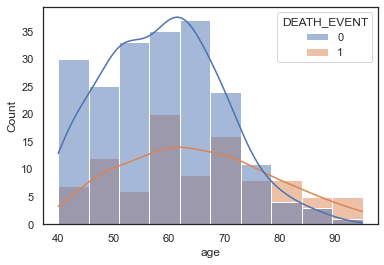

In [163]:
sns.histplot(x='age', data=df, hue='DEATH_EVENT', kde=True)

<AxesSubplot:xlabel='time', ylabel='Count'>

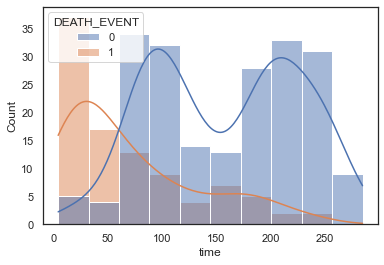

In [173]:
sns.histplot(x='time', data=df, hue='DEATH_EVENT', kde=True)

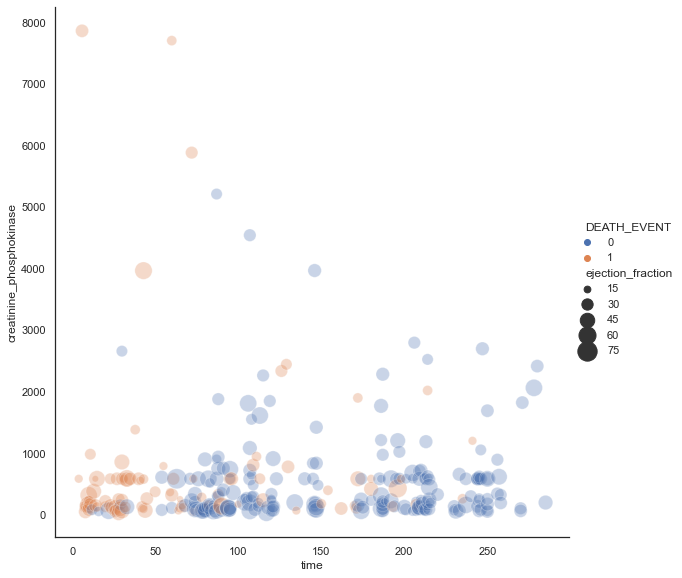

In [182]:
sns.set_theme(style="white")
sns.relplot(x=df['time'], y=df['creatinine_phosphokinase'], size=df["ejection_fraction"], hue=df['DEATH_EVENT'],
            sizes=(40, 400), alpha=.3, palette="deep",
            height=8, data=df)